## 감성 분석 (Sentiment Analysis)

In [1]:
import tensorflow as tf
import numpy as np

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Naver Sentiment Movie Corpus v1.0 다운로드
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')


In [3]:
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')
print('train text length:',len(train_text),' characters')
print('test  text length:',len(test_text),' characters')
print('\n')
print(train_text[:5])
print(train_text[:300])


train text length: 6937271  characters
test  text length: 2318260  characters


id	do
id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [4]:
import pandas as pd
df_train = pd.read_csv(path_to_train_file, sep='\t')
df_train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [6]:
# Y 레이블 추출
# 각 문장을 '\n'으로 분리 -> 헤더제외 -> '\t'으로 분리 -> 마지막 문자 정수로 변환하여 2차원으로 변환
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape,test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [7]:
train_test_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
print(len(train_test_X))

150000


In [9]:
# train 데이터의 입력(X)에 대한 정제(Cleaning)
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힝A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

train_text_X = [clean_str(sentence) for sentence in train_test_X]
train_text_X[:5]

['아 더빙 진짜 짜증나네요 목소리',
 '흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 솔직히 재미는 없다 평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화 ! 스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']

In [10]:
# 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
sentences[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나'],
 ['너무재밓었다그래서보는것을추천한다'],
 ['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정'],
 ['사이몬페그의',
  '익살스런',
  '연기가',
  '돋보였던',
  '영화',
  '!',
  '스파이더맨에서',
  '늙어보이기만',
  '했던',
  '커스틴',
  '던스트가',
  '너무나도',
  '이뻐보였다']]

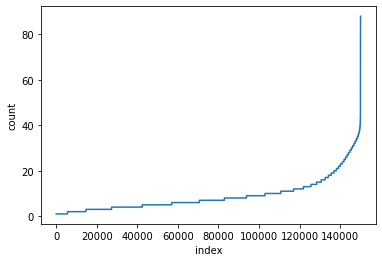

142587


In [11]:
# 150000개 문장의 단어 길이 확인
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.xlabel('index')
plt.ylabel('count')
plt.show()

print(sum([int(l<=25) for l in sentence_len]))
# 15 만개 문장 중 단어 갯수가 25개 이하인 문장의 수가 142590개이다, 25를 sequence_length로 사용


In [14]:
sentences = [sentence[:25] for sentence in sentences]

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000) # 빈도수 높은 20000개 단어만 사용하여 숫자로 반환하고 나머지 공백
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(sequences, padding = 'post')
# padding 없으면 앞부분, post : 뒷부분

# seq2seq면 반전?

train_X[:5]

array([[   25,   877,     8,  6529,  1102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  584,  5657,  6530,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [   71,   343,    31,    35, 10152,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  106,  5213,     4,     2,   863,   571,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]])

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000,300,input_length=25),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(50),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(2,activation='softmax'),
])

# sparse_categorical_crossentropy : 정답 Y가 희소인 다중 분류 모델의 loss
# categorical_crossentropy: 다중 분류 모델의 loss

# loss 종류
# mean_squared_error : 평균제곱 오차
# binary_crossentropy : 이진분류 오차
# categorical_crossentropy : 다중 분류 오차. one-hot encoding 클래스, [0.2, 0.3, 0.5] 와 같은 출력값과 실측값의 오차값을 계산한다.
# sparse_categorical_crossentropy: 다중 분류 오차. 위와 동일하지만 , integer type 클래스라는 것이 다르다.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 25, 300)           6000000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 25, 50)            70200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
re_lu (ReLU)                 (None, 50)               

In [69]:
history = model.fit(train_X, train_Y, epochs=3, batch_size=128,validation_split=0.2,shuffle=True)

Epoch 1/3
938/938 [==============================] - 112s 119ms/step - loss: 0.1760 - accuracy: 0.9109 - val_loss: 0.6779 - val_accuracy: 0.7996
Epoch 2/3
938/938 [==============================] - 108s 115ms/step - loss: 0.1548 - accuracy: 0.9197 - val_loss: 0.7012 - val_accuracy: 0.8018
Epoch 3/3
938/938 [==============================] - 113s 121ms/step - loss: 0.1403 - accuracy: 0.9262 - val_loss: 0.7925 - val_accuracy: 0.7892


In [70]:
history.history['loss']
history.history['val_loss']
history.history['accuracy']
history.history['val_accuracy']

[0.7995666861534119, 0.801800012588501, 0.7892333269119263]

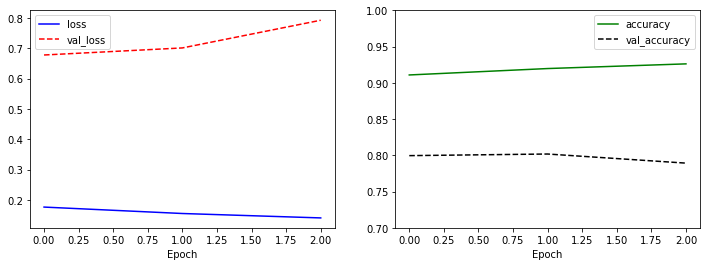

In [71]:
# 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()


In [25]:
# 정확도 측정
# X 값을 추출
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]

test_text_X =[clean_str(sentence) for sentence in test_text_X ]

# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in test_text_X]

# 단어 정제 및 문장 길이 줄임 : 각 단어의 최대 길이를 5로 고정
# 문장의 최대 길이를 25로 잡고 그 이상은 잘라내고 단어의 앞에서 5글자씩만 잘라서 사용한다
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence[:25]])
sentences = sentences_new

sequences = tokenizer.texts_to_sequences(sentences)  # 인덱스를 반환
test_X = pad_sequences(sequences,padding='post')    # 문장의 뒤부분으로 0을 패딩한다, 공백도 0으로 채워진다

test_X[:5]  # 25개의 길이로 패딩 완성

array([[  590,     1,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  354,     9,  4528,   985,    69,  3286,  2726,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [19744,  2074,    32, 12173,   505,  1427,     1,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [17232,   109, 11694,   243, 18228,    11,  3305,   345,   467,
        12318,     5,     5,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]])

In [72]:
accr = model.evaluate(test_X, test_Y, verbose = 0)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.796
  Accuracy: 0.780


### 예측

In [27]:
# 임의의 문장 감성 분석 예측 결과 확인
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ') # ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
test_sentences = []
now_sentence = []

for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
# test_sentences  # 9개

sequences = tokenizer.texts_to_sequences(test_sentences) 
test_X_1 = pad_sequences(sequences,padding='post',maxlen=25) 
# test_X_1

prediction = model.predict(test_X_1)  # 분류할 값 2개가 확률로 출력

for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])


['재미있을']
[0.8978283 0.1021717]
['재미있을', '줄']
[0.75527483 0.24472517]
['재미있을', '줄', '알았는데']
[0.48501518 0.51498485]
['재미있을', '줄', '알았는데', '완전']
[0.6095867  0.39041334]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.6095867  0.39041334]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.80012935 0.19987063]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.9965473  0.00345271]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[9.9905282e-01 9.4719074e-04]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[9.9905282e-01 9.4719074e-04]


In [52]:
# 감성 분석 함수 구현
def sentiment_predict(test_sentence):
    test_sentence = clean_str(test_sentence)
    test_sentence = test_sentence.split(' ')
    test_sentences = []
    now_sentence = []

    for word in test_sentence:
        now_sentence.append(word)
        test_sentences.append(now_sentence[:])

    sequences = tokenizer.texts_to_sequences(test_sentences) 
    test_X_1 = pad_sequences(sequences,padding='post',maxlen=25) 

    prediction = model.predict(test_X_1)  

    for idx, sentence in enumerate(test_sentences):
        score = prediction[idx]
    
    if(score[0] > score[1]):
        print("{:.2f}% 확률로 부정 리뷰입니다.".format(score[0] * 100))
    else:
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format((1 - score[0]) * 100)) 


In [61]:
sentiment_predict('개꿀잼')

94.83% 확률로 긍정 리뷰입니다.


In [57]:
sentiment_predict('별로네요 내 마음의 별로...')

## 이런거 할려면 GPT-3정돈 써야한다고 함....

99.90% 확률로 부정 리뷰입니다.


In [63]:
sentiment_predict('영화가 기가 막혀서 KT한테 고소당할듯')

53.12% 확률로 부정 리뷰입니다.


In [73]:
sentiment_predict('이 영화를 보고 암이 나았습니다')

84.90% 확률로 긍정 리뷰입니다.


In [77]:
train1 = pd.read_csv('train.tsv',sep='\t')
print(train1.shape)

(156060, 4)


In [78]:
train1

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2
